<span style="font-size:110%; text-align:left;"><b><a href="../index.html">2. Plane Waves</a> > <a href="./index.html">3. Optical Modulation</a></b></span>
<br/><br/>
<span style="font-size:200%; text-align:left;"><b>Modulation by a moving mirror</b></span>
<br/><br/>
<span style="font-size:110%; text-align:left;">Author: Daniel Töyrä </span>

<img src="files/modulation_by_moving_mirror.svg" style="width: 500px;" align="center"/>

# Table of Contents
 <p><div class="lev1"><a href="#1.-Introduction">1. Introduction</a></div><div class="lev1"><a href="#2.-Modulation-by-a-moving-mirror">2. Modulation by a moving mirror</a></div><div class="lev2"><a href="#2.1.-Theory">2.1. Theory</a></div><div class="lev2"><a href="#2.2.-Simulation-example">2.2. Simulation example</a></div><div class="lev1"><a href="#3.-Tasks">3. Tasks</a></div><div class="lev2"><a href="#3.1.-Phase-modulation-on-transmission">3.1. Phase modulation on transmission</a></div><div class="lev1"><a href="#4.-Tasks-with-answers">4. Tasks with answers</a></div><div class="lev2"><a href="#4.1.-Phase-modulation-on-transmission">4.1. Phase modulation on transmission</a></div><div class="lev1"><a href="#5.-Summary">5. Summary</a></div>

# 1. Introduction

In this section we show that a laser field being reflected by a moving mirror is phase modulated. This is crucial for understanding some of the main aspects of gravitational wave detection. A gravitational wave affects the length of the space itself, however, as long as the period time of the gravitational wave is much smaller than the roundtrip time of the laser beam in the arms of the detector, the result is the same. This is the case for the gravitational wave sources that LIGO is designed to be sensitive to. Furthermore, many of the noise sources; such as seismic motion radiation pressure, mirror surface vibrations etc.; directly moves the mirror surface.

We will also briefly introduce the `fsig` command, which is a second way of modulating laser fields in FINESSE. 

** Recommended notebooks before you start:**

We recommend that you have looked through the notebook **01_Phase_and_frequency_modulation.ipynb** that you find in the folder [03_Optical_modulation](../03_Optical_modulation/index.html) before you start this one. The link above only works if you started IPython/Jupyter Notebook in the top directory of this course.

**Reading material and references:**

[1] [A. Freise, K. Strain, D. Brown, and C. Bond, "Interferometer Techniques for Gravitational-Wave Detection", *Living Reviews in Relativity* **13**, 1 (2010)](http://arxiv.org/pdf/0909.3661v3). - Living review article (more like a book) on laser interferometry in the frequency domain for detecting gravitational waves, and FINESSE.

[2] [A. Freise, D. Brown, and C. Bond, "Finesse, Frequency domain INterferomEter Simulation SoftwarE"](http://kvasir.sr.bham.ac.uk/redmine/attachments/download/131/Finesse_2.0_manual.pdf). - FINESSE-manual

[3] [FINESSE syntax reference](http://www.gwoptics.org/finesse/reference/) - Useful online syntax reference for FINESSE. Also available in the Finesse manual [2], but this online version is updated more frequently.

** After this session you will... **

* Have seen that phase modulation sidebands are created when a laser field is reflected off a moving mirror
* Have seen that the FINESSE command `fsig` can be used to simulate a moving mirror
* Have seen that the FINESSE command `fsig` only should be used when computing transfer functions
* Have investigated if phase modulation also takes place for the transmitted field

# 2. Modulation by a moving mirror

Importing PyKat and other Python packages that we need, and setting up how to display figures.

In [1]:
import numpy as np                         # Importing numpy
import matplotlib                          # For plotting
import matplotlib.pyplot as plt                   
from pykat import finesse                  # Importing the pykat.finesse package
from pykat.commands import *               # Importing all packages in pykat.commands.
from IPython.display import display, HTML  # Allows us to display HTML.

# Telling the notebook to make plots inline.
%matplotlib inline      
# Initialises the PyKat plotting tool. Change the dpi value 
# to adjust size of figures on your screen.
pykat.init_pykat_plotting(dpi=90)          

                                              ..-
    PyKat 1.0.4           _                  '(
                          \`.|\.__...-""""-_." )
       ..+-----.._        /  ' `            .-'
   . '            `:      7/* _/._\    \   (
  (        '::;;+;;:      `-"' =" /,`"" `) /
  L.        \`:::a:f            c_/     n_'
  ..`--...___`.  .    ,  
   `^-....____:   +.      www.gwoptics.org/pykat



## 2.1. Theory

<img src="mirror_modulation.svg" width=200/>

**Figure.** The figure depicts a moving mirror that has a static offset $\delta x$ relative to a reference plane, and a time dependent term $x_s(t)$ describing its motion. The picture also shows two laser beams: one propagating towards the mirror and one returning after having been reflected by the mirror.

The figure above shows a mirror that has a position determined by two terms: a static offset $\delta x$ and a time dependent term $x_s(t)$. Thus, the position relative to the reference plane can be written as

\begin{align}
x(t) = \delta x + x_s(t).
\end{align}

Further, we let the mirror motion be harmonic, with frequency, amplitude, and phase given by $a_s$, $\Omega_s$ and $\varphi_s$, respectively. Thus the time dependent term can be written

\begin{align}
x_s(t) = a_s \cos(\Omega_s t + \varphi_s).
\end{align}

A monochromatic (single frequency) plane wave entering the reference plane can be described by $E_1(t) = E_0 \exp(i\omega_0 t)$, where $E_0$ is the complex amplitude and $\omega_0$ is the angular frequency of the carrier field. Then the field returning back from the mirror is described by

\begin{align}
E_2(t) =& E_1(t) \exp\big(-2ikx(t)\big) \\
=& E_1(t) \exp (-2ik\delta x) \exp\big[-2ik a_s \cos(\Omega t + \varphi_s) \big]
\end{align}

where we have assumed that the mirror has a reflectivity of one, and no phase shift occurs on reflection. The laser field now got two new phase factors: one due to the static offset, which we call **tuning** and is a property of the mirror in FINESSE, and one due to the moving mirror which gives rise to an oscillating phase. This oscillating part is what we will focus on in this notebook. We can see that this oscillating part is the same as the oscillating phase we looked at in the phase modulation part of the [phase and frequency modulation notebook](01_Phase_and_freq_modulation.ipynb). Thus, this moving mirror gives rise to phase modulation with a modulation frequency equal to the mirror oscillation frequency. If you want to read more about phase modulation by a moving mirror see section 3.6 in the living review article [1].

## 2.2. Simulation example

In this example we look at what happens with a laser field reflected off a mirror being shaken along the optical axis with the FINESSE command `fsig`. The setup can be seen below, where the red laser fields represent the carrier and the blue and green represent sidebands.

<img src="mirror_mod_setup.svg" width=350/>

The `fsig`-command is the second type of modulator offered by FINESSE (the other being through the command `mod`). While the `mod` is an optical component on its own that operates on the field, `fsig` is used to apply a signal modulation to existing optical components. The biggest and very important difference is that `fsig` is meant to be used for computing transfer functions, i.e., when the applied signal is infinitely small. In this region the systems are assumed to be linear, thus FINESSE discards all non-linearities when modulating with `fsig`, which is important to understand. In the example below we will see a potential problem that can arise if this is not understood. 

If you want to read about the `fsig`-command, you find information in the online syntax reference [3] and section 3.4.5 and section G.2 in the FINESSE manual [2].

Building the core FINESSE model:

In [2]:
basekat = finesse.kat()          # Initialising Finesse
basekat.verbose = False          # Tells Finesse to talk less

# Parsing the code
code = """
## The optical system ##
l laser 1 0 n0                               # Laser (Power = 1W, Freq offset = 0 Hz)
s s1 1 n0 nBS1                               # Space, laser to BS (L = 1 m)
bs BS1 0.5 0.5 0 45 nBS1 dump nBS3 nBS4      # Beam splitter (R=T=0.5, phi=0 deg, 
                                             # AoI=45 deg)
s s2 1 nBS3 nM1                              # Space, BS to Mirror (L = 1 m)
m M1 1 0 0 nM1 nM2                           # Mirror (R=1, T=0, phi=0 deg)
s s3 1 nBS4 nOut                             # Space, BS to detectors (L = 1m)

## Shaking the mirror longitudinally ##
fsig sig1 M1 100 0 1                         # Signal (f=100 Hz, phase=0 deg, 
                                             # amplitude=1)
"""
# Parsing FINESSE-code
basekat.parseCommands(code)

Adding detectors and simulation instructions:

In [3]:
kat1 = basekat.deepcopy()
code = """
## Detectors ##

# Amplitude detectors
ad car 0 nOut             # Carrier (Offset = 0 Hz)
ad up1 100 nOut           # 1st upper sideband (Offset = 100 Hz)
ad low1 -100 nOut         # 1st lower sideband (Offset = -100 Hz)
ad up2 200 nOut           # 2nd upper sideband (Offset = 200 Hz)

## Simulation instructions ##
xaxis sig1 amp lin 0.01 2 200   # Sweeping amplitude of sig1 between 0.01 and 2. 
yaxis abs
"""

# Parsing FINESSE code and running
kat1.parseCommands(code)
out1 = kat1.run()

Plotting results:

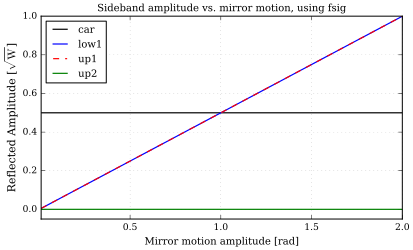

In [4]:
## Plotting ##
# -------------
fig1 = out1.plot(styles={'car': '-k','up1':'--r', 'low1': '-b',  'up2':'g-'},
                 xlabel='Mirror motion amplitude [rad]',
                 ylabel='Reflected Amplitude [$\sqrt{\mathrm{W}}$]',
                 title='Sideband amplitude vs. mirror motion, using fsig', 
                 ylim=(-0.05,1))

The figure shows that the amplitudes of the first sideband pair (blue solid and red dashed trays) increase with increasing amplitude of the mirror motion, and that no second sideband pair is created (green). Note that no amplitude is removed from the carrier (black trace) as the sideband amplitudes grow bigger with increasing mirror motion, thus energy is not conserved. The reason is that `fsig` is intended to be used as input signal when computing transfer functions. 

When computing transfer functions the amplitude of the signal (modulation index in this case, called $a_s$ in equations above) is assumed to be very small so that the system is linear. Since the system is linear, only the ratio between the input and the output matters, which does not depend on the input amplitude. Thus, for simplicity, in FINESSE the input signal amplitude is set to unity by default. We can then use the amplitude parameter in `fsig` to scale different `fsig`s compared to each other when needed, as this will just be the same as multiplying the transfer function with the amplitude parameter. See section *signal frequencies* in section 3.4.5 in in the FINESSE manual [2] if you want to read more about the `fsig` command.


This example was meant to illustrate that frequency sidebands are created when a laser field is reflected off a moving mirror, and that the mirror motion can be injected by using the command `fsig`. However, as mentioned above, the way we use `fsig` in this example does not result in physically correct results, unless we use a really small modulation index. Generally, use `fsig` only when wanting to compute a transfer function, and leave the `fsig` amplitude set to unity, which is the default value. We will see how `fsig` is used to create transfer functions in later notebooks.

# 3. Tasks

## 3.1. Phase modulation on transmission

Modify the example above to investigate if the transmitted field is phase modulated as well. Try to explain the result you see.

**Answer:**

# 4. Tasks with answers

## 4.1. Phase modulation on transmission

Modify the example above to investigate if the transmitted field is phase modulated as well. Try to explain the result you see.

**Answer:**

In the above example we need to change:

* The reflectance and transmittance of the mirror, otherwise no field will be transmitted
* Move the detectors to be behind the mirror, i.e., at node `nM2`
* In the solution below we also skipped to measure the second order sideband.

In [5]:
# Copying basekat
kat2 = basekat.deepcopy()
# Chaning mirror reflection and transmission
kat2.M1.R = 0.9
kat2.M1.T = 0.1
# Adding detectors and simulation instructions
code = """
## Detectors ##
# Amplitude detectors
ad car 0 nM2             # Carrier (Offset = 0 Hz)
ad up1 100 nM2           # 1st upper sideband (Offset = 100 Hz)
ad low1 -100 nM2         # 1st lower sideband (Offset = -100 Hz)

## Simulation instructions ##
xaxis sig1 amp lin 0.01 2 200   # Sweeping amplitude of sig1 between 0.01 and 2. 
yaxis abs                       # Returns magnitude of detector outputs
"""

# Parsing FINESSE code and running simulation
kat2.parseCommands(code)
out2 = kat2.run()

Plotting results:

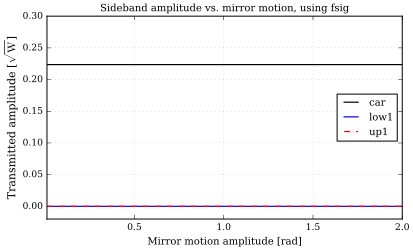

In [6]:
fig2 = out2.plot(styles={'car': '-k','up1':'--r', 'low1': '-b'}, 
                 xlabel='Mirror motion amplitude [rad]',
                 ylabel='Transmitted amplitude [$\sqrt{\mathrm{W}}$]',
                 title='Sideband amplitude vs. mirror motion, using fsig', 
                 ylim=(-0.02,0.3))

We see that only the carrier field is present, no sidebands. The reason is that the propagated path length is not altered on transmission. If we set a reference plane before and after the mirror, the distance the field travels between the two fixed reference planes are independent on the exact mirror position between these reference planes. 

# 5. Summary

In this session we have:
* seen an example of that a moving mirror creates phase modulation sidebands for the reflected field
* seen that the `fsig` command can be used to modulate (shake) a mirror
* seen why `fsig` should be used only when computing transfer functions.
* investigated if the transmitted field is modulated as well, and concluded that it is not.
